# Aurora



**Refined Research Question: For Mexico City, what neighbourhood would be best in terms of location and listing options?**

I plan to answer this by plotting the airbnb listings by availability and price and seeing the most affordable price that has the most avalailbility across Mexico city.

### Analysis plan:
1. Import data set of each city and drop NaN and irrelevant columns such as host_id etc
1. Consolidate the three processed data sets for combined analysis
1. Filter data in terms of forming an analysis for the research question above and team members desired research
1. Add a column to identify data specific to each city
1. Explore different possible data visualizations and use relevant axis and scales to ensure accurate representation, maybe a scatter plot could be used to see where the most populated listings are in terms of price and availability



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('../data/raw/Mexico_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,0,NaN,NaN,1,363,0,NaN
1,2.075738e+06,Amazing apartment Mexico City!!!,2339771,Rodrigo,NaN,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,73,2022-12-12,0.67,1,271,17,NaN
2,7.830800e+05,Nice quiet room in a lovely house!!,1767559,Anna,NaN,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,2,2022-07-31,0.02,2,303,1,NaN
3,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000,1,62,2022-11-06,0.46,12,350,12,NaN
4,7.834800e+05,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,27,2019-11-30,0.25,2,361,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23009,7.884080e+17,» Casa Löu - Morelli «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,0,NaN,NaN,12,364,0,NaN
23010,7.884120e+17,» Casa Löu - Tlanezi «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,0,NaN,NaN,12,360,0,NaN
23011,7.884220e+17,Almendra/hermoso depa entero,491035565,Jose Luis,NaN,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,0,NaN,NaN,10,357,0,NaN
23012,7.884240e+17,Iconic 2-story apartment in the heart of Condesa!,10872978,Pablo,NaN,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,0,NaN,NaN,1,3,0,NaN


## EDA Analysis
Generate questions about your data
Search for answers by visualizing
Refine or generate new questions


For each city: 
    what are the charcteristics in listings that offer the best price?
    what are the characteristics in listings that are most available?



In [ ]:
## Starting with the Mexico City dataset, I will begin to look at the content of the data
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,2.301400e+04,2.301400e+04,0.0,23014.000000,23014.000000,23014.000000,23014.000000,23014.000000,19751.000000,23014.000000,23014.000000,23014.000000,0.0
mean,2.144347e+17,1.737494e+08,NaN,19.402518,-99.168232,2093.338403,4.602720,35.784131,1.717524,12.114973,249.531372,13.461719,NaN
std,3.193250e+17,1.479031e+08,NaN,0.043412,0.034169,19087.842143,26.158465,61.373146,1.941448,28.359730,124.604632,21.070606,NaN
min,3.579700e+04,7.365000e+03,NaN,19.184960,-99.339630,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,3.130796e+07,4.560394e+07,NaN,19.384673,-99.180079,550.000000,1.000000,2.000000,0.470000,1.000000,149.000000,1.000000,NaN
50%,4.703304e+07,1.294819e+08,NaN,19.413900,-99.168505,970.000000,2.000000,12.000000,1.140000,3.000000,314.000000,6.000000,NaN
75%,6.101950e+17,2.763775e+08,NaN,19.431340,-99.154890,1612.500000,2.000000,42.000000,2.420000,9.000000,358.000000,19.000000,NaN
max,7.920050e+17,4.930673e+08,NaN,19.561010,-98.963360,999998.000000,1125.000000,1068.000000,44.870000,231.000000,365.000000,549.000000,NaN


From the describe function, I can see the mean price is $2093.34. Also, the mean availability for throughout the year is 249.53. I think that by comparing this to the room_type of the airbnb listings in the data set, it will be interesting to see what types of listings are most popular amoung the average price and availability. From this, I could also find the most valuable room_type in Mexico City in terms of best price and number of listings. Also, the max price is very high, so I will want to set a new maximum based on my budget since this research is focused on travellers like myself.

In [ ]:
# I want to look at what the possible room types are for the airbnb listings in the data set
sorted(df['room_type'].unique().tolist())

['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

Through the different room types I can locate this minimum price and maximum avaliability for each type to determine which type has the best price and availability

In [ ]:
# I want to see the maximum availabiltiy and minimum price of the data set
df['availability_365'].max(), df['price'].min()

(365, 0)

From this I can see that there are listings that have availabilty year-round since the max is 365 days. The min price of 0 indicates that there is some data that I will have to drop since this may be tied to a NaN value.

In [ ]:
# I want to see the mean availabilty and price under each room type
new_data = df.groupby(df.room_type)[['availability_365','price']].mean()
new_data


,availability_365,price
room_type,,
Entire home/apt,245.191612,2461.577266
Hotel room,251.530769,2482.553846
Private room,255.842639,1428.970479
Shared room,301.181185,955.177700


 the availability across the different room types does not differ much in terms of average availability. I will keep exploring other variables that may bring more insightful visulatizations in terms of room type and price

In [ ]:
# count of number of occurences per room type
df['count'] = df.groupby('room_type')['room_type'].transform('count')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,count
0,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,0,NaN,NaN,1,363,0,NaN,14806
1,2.075738e+06,Amazing apartment Mexico City!!!,2339771,Rodrigo,NaN,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,73,2022-12-12,0.67,1,271,17,NaN,14806
2,7.830800e+05,Nice quiet room in a lovely house!!,1767559,Anna,NaN,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,2,2022-07-31,0.02,2,303,1,NaN,7791
3,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000,1,62,2022-11-06,0.46,12,350,12,NaN,14806
4,7.834800e+05,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,27,2019-11-30,0.25,2,361,0,NaN,7791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23009,7.884080e+17,» Casa Löu - Morelli «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,0,NaN,NaN,12,364,0,NaN,7791
23010,7.884120e+17,» Casa Löu - Tlanezi «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,0,NaN,NaN,12,360,0,NaN,7791
23011,7.884220e+17,Almendra/hermoso depa entero,491035565,Jose Luis,NaN,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,0,NaN,NaN,10,357,0,NaN,14806
23012,7.884240e+17,Iconic 2-story apartment in the heart of Condesa!,10872978,Pablo,NaN,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,0,NaN,NaN,1,3,0,NaN,14806


[Text(0.5, 1.0, 'Number of Listings per Room Type')]

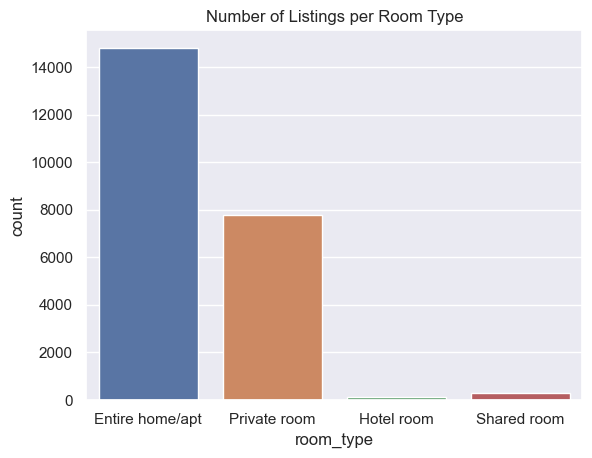

In [ ]:
import seaborn as sns
plot2 = sns.set_theme(style="whitegrid")
plot2 = sns.set_theme("notebook",font_scale=1)
plot2 = sns.barplot(data=df, x ="room_type", y="count")
plot2.set(title="Number of Listings per Room Type")

From this I can see that the most frequent occurences for room type is entire home/apt and then private room. This may be helpful to refine my research to only looking at entire home/apt and private room compare the differences within this type such as what is the average price and availability for neighborhood for the city.

In [ ]:
#location of room_type in terms of neighbourhood and availability
# what neighborhoods have the lowest priced entire homes/apt

In [ ]:
n = sorted(df["neighbourhood"].unique().tolist())
n

['Azcapotzalco',
 'Benito Juárez',
 'Coyoacán',
 'Cuajimalpa de Morelos',
 'Cuauhtémoc',
 'Gustavo A. Madero',
 'Iztacalco',
 'Iztapalapa',
 'La Magdalena Contreras',
 'Miguel Hidalgo',
 'Milpa Alta',
 'Tlalpan',
 'Tláhuac',
 'Venustiano Carranza',
 'Xochimilco',
 'Álvaro Obregón']

[Text(0.5, 1.0, 'Number of listings per neighbourhood')]

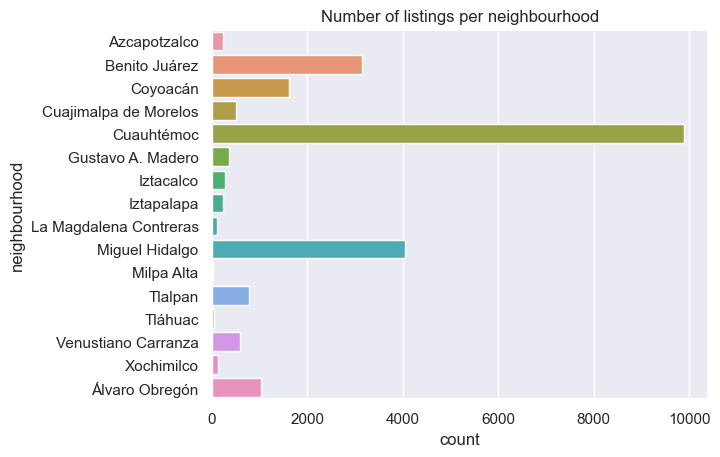

In [ ]:
plot3 = sns.countplot(y="neighbourhood",data=df,order=n)
plot3.set(title="Number of listings per neighbourhood")

This graph could be used along with the count of listings per room type to see where the most occurences for a entire home/apt is located in each city. It appears that cuauhtemoc has the most listings out of any of the other neighbourhoods. It would be interesting to map out where the neighbourhoods are located throughout the city then see the related prices for listings in each neighbourhood for the top 3 populated neighbourhoods in terms of listing count

### Analysis plan:
1. Import data set of each city and drop NaN and irrelevant columns 
1. Clean the price data and ensure consitency in currency value across data, also address outliers
1. Clean the room type data for each data set and ensure consistency
1. Analyze the prices in room types across cities and their locations in terms of neighbourhoods
1. Consolidate the three processed data sets for combined analysis
1. Filter data in terms of forming an analysis for the research question above and team members desired research
1. Add a column to identify data specific to each city
1. Explore different possible data visualizations and use relevant axis and scales to ensure accurate representation, it would be interesting to see the price and room type data shown on a geographical plot of each city

## Analysis Pipeline
Load Data

   - Check file types and encodings.
   - Check delimiters (space, comma, tab).
   -  Skip rows and columns as needed.

Clean Data

   - Remove columns not being used.
   - Deal with “incorrect” data.
   - Deal with missing data.

Process Data

   - Create any new columns needed that are combinations or aggregates of other columns (examples include weighted averages, categorizations, groups, etc…).
   - Find and replace operations (examples include replacing the string ‘Strongly Agree’ with the number 5).
   - Other substitutions as needed.
   - Deal with outliers. I will make the maximum price point equivalent to $200 Canadian since this research is focused on travellers like myself with a limited budget

Wrangle Data

   - Restructure data format (columns and rows).
   -  Merge other data sources into your dataset.

In [ ]:
#Load data
df = pd.read_csv('../data/raw/Mexico_listings.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,0,NaN,NaN,1,363,0,NaN
1,2.075738e+06,Amazing apartment Mexico City!!!,2339771,Rodrigo,NaN,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,73,2022-12-12,0.67,1,271,17,NaN
2,7.830800e+05,Nice quiet room in a lovely house!!,1767559,Anna,NaN,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,2,2022-07-31,0.02,2,303,1,NaN
3,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000,1,62,2022-11-06,0.46,12,350,12,NaN
4,7.834800e+05,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,27,2019-11-30,0.25,2,361,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23009,7.884080e+17,» Casa Löu - Morelli «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,0,NaN,NaN,12,364,0,NaN
23010,7.884120e+17,» Casa Löu - Tlanezi «,206540191,Loü Dêvēt,NaN,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,0,NaN,NaN,12,360,0,NaN
23011,7.884220e+17,Almendra/hermoso depa entero,491035565,Jose Luis,NaN,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,0,NaN,NaN,10,357,0,NaN
23012,7.884240e+17,Iconic 2-story apartment in the heart of Condesa!,10872978,Pablo,NaN,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,0,NaN,NaN,1,3,0,NaN


In [ ]:
#clean the data by dropping unneccessary columns
clean_data = df.drop(columns = ["id", "name", "host_id", "host_name", "neighbourhood_group","number_of_reviews","last_review", "reviews_per_month","calculated_host_listings_count","number_of_reviews_ltm","license"])
clean_data

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,363
1,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,271
2,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,303
3,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000,1,350
4,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,361
...,...,...,...,...,...,...,...
23009,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,364
23010,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,360
23011,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,357
23012,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,3


In [ ]:
# drop listings that have a minimum night requirement of higher than 14 days
clean_data=clean_data.drop(clean_data[clean_data['minimum_nights']>14].index).reset_index(drop=True)
clean_data

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,363
1,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,271
2,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,303
3,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000,1,350
4,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,361
...,...,...,...,...,...,...,...
22115,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,364
22116,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,360
22117,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,357
22118,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,3


In [ ]:
# drop values that are greater than 10000
clean_data=clean_data.drop(clean_data[clean_data['price']>10000].index).reset_index(drop=True).assign(price_cad=lambda x: x['price']*0.06472)
clean_data

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,price_cad
0,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3882,1,363,251.24304
1,Cuauhtémoc,19.419090,-99.160430,Entire home/apt,2764,2,271,178.88608
2,La Magdalena Contreras,19.330090,-99.214180,Private room,583,1,303,37.73176
3,Cuajimalpa de Morelos,19.353790,-99.284590,Private room,500,2,361,32.36000
4,Cuauhtémoc,19.415300,-99.167630,Entire home/apt,1823,3,142,117.98456
...,...,...,...,...,...,...,...,...
21898,Cuauhtémoc,19.441031,-99.139783,Private room,158,1,364,10.22576
21899,Cuauhtémoc,19.440975,-99.140114,Private room,173,1,360,11.19656
21900,Coyoacán,19.349294,-99.153252,Entire home/apt,531,1,357,34.36632
21901,Cuauhtémoc,19.415108,-99.169176,Entire home/apt,3913,3,3,253.24936


In [ ]:
clean_data.describe()

,latitude,longitude,price,minimum_nights,availability_365,price_cad
count,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000,21903.000000
mean,19.402822,-99.168094,1326.749075,2.039081,249.429576,85.867200
std,0.043018,0.034155,1242.101143,1.623364,124.560057,80.388786
min,19.184960,-99.339630,0.000000,1.000000,0.000000,0.000000
25%,19.385900,-99.179970,554.000000,1.000000,148.000000,35.854880
50%,19.414140,-99.168460,972.000000,2.000000,314.000000,62.907840
75%,19.431305,-99.154880,1600.000000,2.000000,358.000000,103.552000
max,19.561010,-98.963360,10000.000000,14.000000,365.000000,647.200000


## Building and Testing my method chain

In [ ]:
# Method chaining

# Apply Exchange rate conversion to the price in pesos to convert to Canadian dollars (Used average exchange rate for 2022)

y = 0.0648

#Drop irrelevant columns, drop minimum nights if >14, Drop price >10,000 and add column with exchange rate, sort by price

new_df = (
    df.drop(columns = ["id", "name", "host_id", "host_name", "neighbourhood_group","number_of_reviews","last_review", "reviews_per_month","calculated_host_listings_count","number_of_reviews_ltm","license"])
    .drop(df[df['price']>3100].index) .loc[lambda x: x['minimum_nights']<15].loc[lambda x: x['price']>0]
    .assign(price_cad=lambda x: x['price']*y)).sort_values("price", ascending=True).reset_index(drop=True)
new_df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,price_cad
0,Cuauhtémoc,19.404440,-99.162690,Shared room,97,1,362,6.2856
1,Cuauhtémoc,19.403540,-99.161880,Shared room,97,1,362,6.2856
2,Cuauhtémoc,19.405480,-99.161980,Shared room,105,1,361,6.8040
3,Cuauhtémoc,19.404440,-99.162690,Shared room,119,1,360,7.7112
4,Cuauhtémoc,19.405270,-99.161920,Shared room,122,1,365,7.9056
...,...,...,...,...,...,...,...,...
20397,Cuauhtémoc,19.414452,-99.165009,Entire home/apt,3097,1,297,200.6856
20398,Miguel Hidalgo,19.443580,-99.212060,Private room,3099,2,173,200.8152
20399,Cuauhtémoc,19.428050,-99.172670,Entire home/apt,3100,2,324,200.8800
20400,Cuauhtémoc,19.406236,-99.176756,Entire home/apt,3100,2,364,200.8800


Reference for [Exchange rate](https://www.exchangerates.org.uk/MXN-CAD-spot-exchange-rates-history-2022.html)

In [ ]:
new_df.describe()

,latitude,longitude,price,minimum_nights,availability_365,price_cad
count,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000,20402.000000
mean,19.402346,-99.167410,1067.087982,2.052054,248.718704,69.147301
std,0.043305,0.034444,670.548010,1.635453,125.185189,43.451511
min,19.185910,-99.339630,97.000000,1.000000,0.000000,6.285600
25%,19.383662,-99.179600,533.000000,1.000000,147.000000,34.538400
50%,19.413590,-99.167941,907.000000,2.000000,315.000000,58.773600
75%,19.431370,-99.153810,1430.000000,2.000000,358.000000,92.664000
max,19.561010,-98.963360,3100.000000,14.000000,365.000000,200.880000


In [ ]:
#Step 2 and 3 wrap and move project function
def load_and_process(path='../data/raw/mexico_listings.csv'):

    # Method Chain 1 (Load data and drop uneccessary columns)

    df1 = (pd.read_csv("../data/raw/Mexico_listings.csv").drop(columns = ["id", "name", "host_id", "host_name", "neighbourhood_group","number_of_reviews","last_review", "reviews_per_month","calculated_host_listings_count","number_of_reviews_ltm","license","availability_365"]))
          

    # Method Chain 2 (drop outlier prices, minimum nights over 15 days, keep only prices over $0, sort by price

    df2 = (df1.drop(df1[df1['price']>10000].index) .loc[lambda x: x['minimum_nights']<15].loc[lambda x: x['price']>0]
    .assign(price_cad=lambda x: x['price']*0.06472)).sort_values("price", ascending=True).reset_index(drop=True)

    # Make sure to return the latest dataframe

    return df2

In [ ]:
import code
from script import Project_functions2 as pt


In [ ]:
pt.load_and_process('../data/raw/mexico_listings.csv')

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,price_cad
0,Cuauhtémoc,19.40444,-99.16269,Shared room,97,1,6.27784
1,Cuauhtémoc,19.40354,-99.16188,Shared room,97,1,6.27784
2,Cuauhtémoc,19.40548,-99.16198,Shared room,105,1,6.79560
3,Cuauhtémoc,19.40444,-99.16269,Shared room,119,1,7.70168
4,Cuauhtémoc,19.40527,-99.16192,Shared room,122,1,7.89584
...,...,...,...,...,...,...,...
21894,Cuauhtémoc,19.43834,-99.15405,Entire home/apt,10000,4,647.20000
21895,Cuauhtémoc,19.42132,-99.17418,Private room,10000,1,647.20000
21896,Benito Juárez,19.37960,-99.16761,Private room,10000,1,647.20000
21897,Coyoacán,19.30973,-99.15334,Entire home/apt,10000,1,647.20000


# Task 3: Data analysis

## Research question: For Mexico City, what neighbourhood would be best in terms of location and listing options?
- For travelers on a budget, I would like to see the available options to them for using airbnb in Mexico city, and which neighbourhood will be best to look at if they wanted to travel there at any point in the year.
- I will look at three main factors: lisiting density, Price compared to other neighbourhoods, and Year-round availability

# Step 1: I will see what the top three neighborhoods are for availability of listings

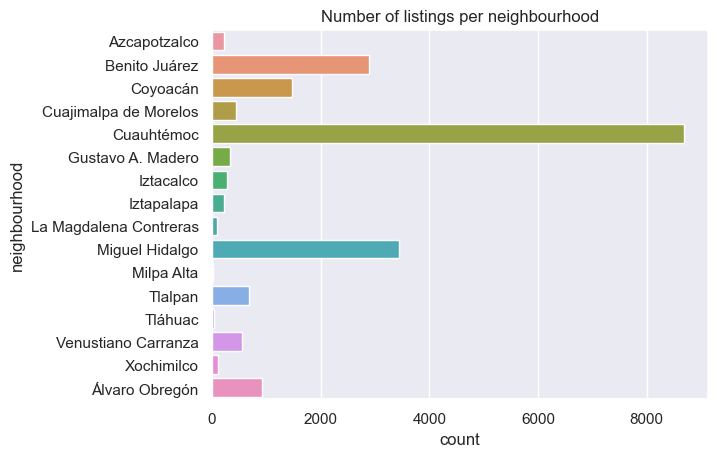

In [ ]:


n = sorted(new_df["neighbourhood"].unique().tolist())

plot3 = sns.countplot(y="neighbourhood",data=new_df,order=n)
plot3.set(title="Number of listings per neighbourhood")
plt.savefig('2Listings.png')

## Summary
- From this, I can see that the top three neighbourhoods in terms of listing availability are Cuauhtémoc, Miguel Hidalgo, and Benito Juárez

# Step 2: I will see where the top three neighbourhoods are located on a map of mexico city and see the density of the listings per neighbourhood

In [ ]:
new_df3 = new_df.loc[lambda x: x['neighbourhood']=="Miguel Hidalgo"]

In [ ]:
new_df2 = new_df.loc[lambda x: x['neighbourhood']=="Cuauhtémoc"]


In [ ]:
new_df4 = new_df.loc[lambda x: x['neighbourhood']=="Benito Juárez"]

In [ ]:
combined_df = pd.concat([new_df2, new_df3, new_df4], axis="rows")



In [ ]:
BBox = ((combined_df.longitude.min(),   combined_df.longitude.max(),      
         combined_df.latitude.min(), combined_df.latitude.max()))
BBox

(-99.25414, -99.12312, 19.35752, 19.47026)

In [ ]:
mex = plt.imread('../data/raw/map.png')


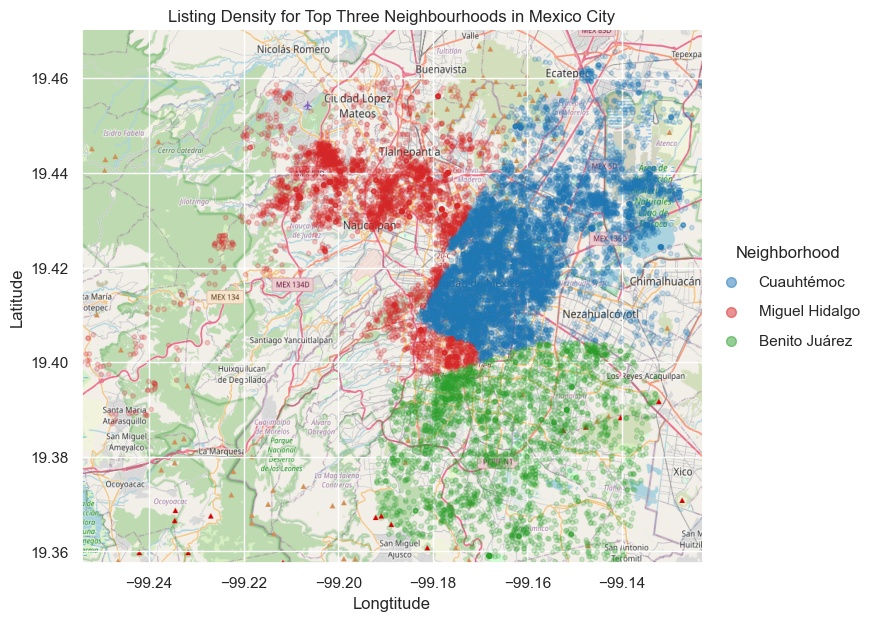

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
colors = {'Cuauhtémoc':'tab:blue', 'Miguel Hidalgo':'tab:red', 'Benito Juárez':'tab:green'}
ax.scatter(combined_df.longitude, combined_df.latitude, zorder=1, alpha= 0.2, c=combined_df['neighbourhood'].map(colors), s=10)
ax.set_title('Listing Density for Top Three Neighbourhoods in Mexico City')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mex, zorder=0, extent = BBox, aspect= 'equal')
sns.despine()
ax.set_ylabel("Latitude")
ax.set_xlabel("Longtitude")
for neighborhood, color in colors.items():
    ax.scatter([], [], c=color, alpha=0.5, s=50, label=neighborhood)

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Neighborhood',loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('2Map.png')
# need to keep the second neigbourhood to compare the location
# colour coat and see how the prices compare and add the thrid biggest one

## Summary
- As seen, the Cuauhtémoc neighbourhood has the most concentrated listings and is located in the center of the city of Mexico

# Step 3: I want to compare the prices of the different neighbourhoods across all room types

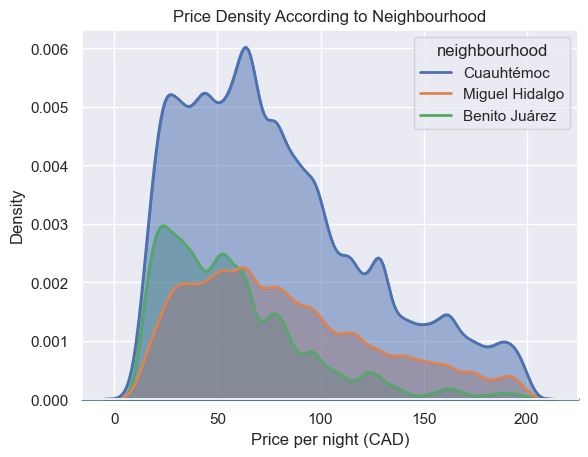

In [ ]:
 sns.kdeplot(data=combined_df, x="price_cad", hue="neighbourhood", bw_adjust=.5, clip_on=False, fill=True, alpha=0.5, linewidth=1.5)
 sns.kdeplot(data=combined_df, x="price_cad", hue="neighbourhood", clip_on=False, color="w", lw=2, bw_adjust=.5)

plt.axhline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

plt.xlabel('Price per night (CAD)')
plt.title('Price Density According to Neighbourhood')

plt.savefig('2PriceDensity.png')
plt.show()

## Finding:
- Benito Juarez is on the lower end of the price range, the other two neighbourhoods are fairly similar

# Step 4: I want to see the year-round availability across the three different neighbourhoods

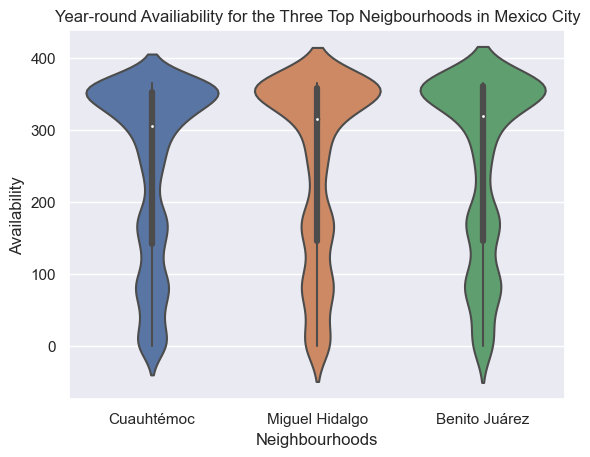

In [ ]:
ax = sns.violinplot(data= combined_df, x='neighbourhood', y='availability_365')
ax.set_title("Year-round Availiability for the Three Top Neigbourhoods in Mexico City")
ax.set_ylabel("Availability")
ax.set_xlabel("Neighbourhoods")

plt.savefig('2Availabiltiy.png')
plt.show()

## Finding
 - All three neighbourhoods offer relatively the same availability year-round

# Step 5: Since the Cuauhtemoc neighbourhood is the most dense, I want to see what room types are available 

In [ ]:
# adding a count column for the room types
new_df['count'] = new_df.groupby('room_type')['room_type'].transform('count')
new_df

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,price_cad,count
0,Cuauhtémoc,19.404440,-99.162690,Shared room,97,1,362,6.2856,221
1,Cuauhtémoc,19.403540,-99.161880,Shared room,97,1,362,6.2856,221
2,Cuauhtémoc,19.405480,-99.161980,Shared room,105,1,361,6.8040,221
3,Cuauhtémoc,19.404440,-99.162690,Shared room,119,1,360,7.7112,221
4,Cuauhtémoc,19.405270,-99.161920,Shared room,122,1,365,7.9056,221
...,...,...,...,...,...,...,...,...,...
20397,Cuauhtémoc,19.414452,-99.165009,Entire home/apt,3097,1,297,200.6856,12922
20398,Miguel Hidalgo,19.443580,-99.212060,Private room,3099,2,173,200.8152,7153
20399,Cuauhtémoc,19.428050,-99.172670,Entire home/apt,3100,2,324,200.8800,12922
20400,Cuauhtémoc,19.406236,-99.176756,Entire home/apt,3100,2,364,200.8800,12922


In [ ]:
#Locking only the Cuahtemoc neighbourhood for analysis
new_df2 = new_df.loc[lambda x: x['neighbourhood']=="Cuauhtémoc"]
new_df2

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,price_cad,count
0,Cuauhtémoc,19.404440,-99.162690,Shared room,97,1,362,6.2856,221
1,Cuauhtémoc,19.403540,-99.161880,Shared room,97,1,362,6.2856,221
2,Cuauhtémoc,19.405480,-99.161980,Shared room,105,1,361,6.8040,221
3,Cuauhtémoc,19.404440,-99.162690,Shared room,119,1,360,7.7112,221
4,Cuauhtémoc,19.405270,-99.161920,Shared room,122,1,365,7.9056,221
...,...,...,...,...,...,...,...,...,...
20394,Cuauhtémoc,19.422470,-99.165810,Entire home/apt,3094,1,215,200.4912,12922
20397,Cuauhtémoc,19.414452,-99.165009,Entire home/apt,3097,1,297,200.6856,12922
20399,Cuauhtémoc,19.428050,-99.172670,Entire home/apt,3100,2,324,200.8800,12922
20400,Cuauhtémoc,19.406236,-99.176756,Entire home/apt,3100,2,364,200.8800,12922


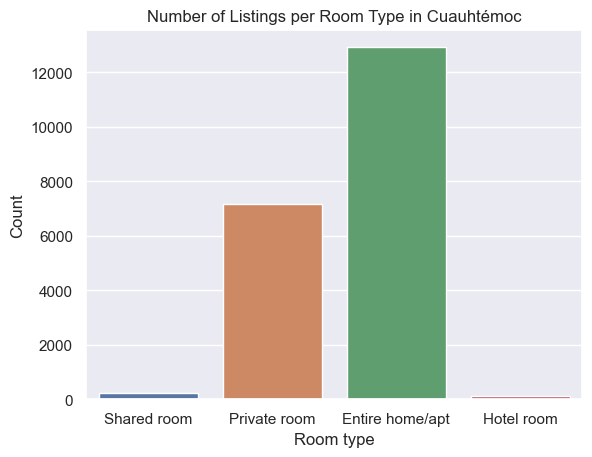

In [ ]:
plot3 = sns.set_theme(style="whitegrid")
plot3 = sns.set_theme("notebook",font_scale=1)
plot3 = sns.barplot(data=new_df2, x ="room_type", y="count")
plot3.set(title="Number of Listings per Room Type in Cuauhtémoc")
plot3.set_ylabel("Count")
plot3.set_xlabel("Room type")
plt.savefig('2RoomType.png')

## Finding: 
 - The top two room types for Cuauhtemoc are entire home and private room

## Step 6: I would like to see the price differences between the room types in Cuauhtemoc

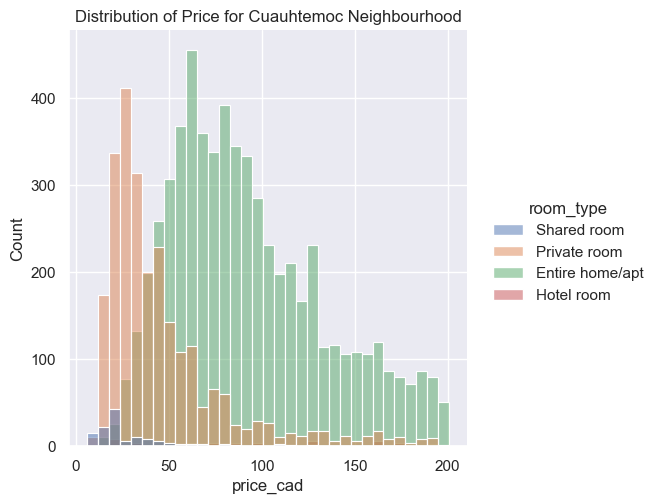

In [ ]:

plot4 = sns.displot(new_df2, x="price_cad",  hue="room_type")
plot4.set(title="Distribution of Price for Cuauhtemoc Neighbourhood")
plt.savefig('2RoomPrices.png')

## Finding:
 - The Entire home room type has the most listings within the $50 to 100 price range
 
 - The private room type has the most within the $ 50 price range.

# Summary of findings

**Research question: For Mexico City, what neighbourhood would be best in terms of location and listing options?**

Answer: From my findings, the Cuauhtémoc neighbourhood offers the best location in terms of being in the center of Mexico City, the most available listings out of all room types compared to the other neighbourhoods, and offers Entire home and private room listings within a reasonable price range. Therefore, I conclude that the Cuauhtémoc is the best neighbourhood in Mexico City when looking for an airbnb.

I came to this conclusion in the following ways:
 - The geospatial graph showed that the number of listings for the Cuauhtémoc area was the most dense, also seen by the count plot, this neigbourhood has the most number of listings out of any neighbourhood in Mexico city. The locations of the lisitngs in these neighbourhoods are concentrated in the city centre, which is convienent for travelers hoping to stay close to that area in terms of options for them to choose from.
 
 - When comparing the prices of the top three neighbourhoods in terms of availability, the Cuauhtémoc neighbourhood had the most price density within the $50-100 range, the other two neigbourhoods offered similar price ranges, but was slightly less expensive. Overall, the prices in the Cuauhtémoc region are reasonable to what other neighbourhoods are offering.
 
 - When looking at the year-round availility across the three neighbourhoods, all three offer nearly the same availablity of year-round for most of their lisitngs, thus making Cuauhtémoc still more appealing due to the density of their listings in the city centre
 
 - The specific room types offered in the Cuauhtémoc are majority entire homes and private rooms which is most preferrable to me as a traveller. When looking at how the price range varies for the room types across the Cuauhtémoc neighbourhood, the entire home type is the most expensive, but still offers a large amount of listings for under $200 Canadian
 
 Overall, the Cuauhtémoc neighbourhood offers great options for travellers like myself with a limited budget of under $200 Canadian per night. It has year-round availability for the majority of its listings, a high selection of private, and entire home listings, reasonable price points compared to the other popular neighbourhoods, and is located in the city centre with a high density of listings within close proximity. Therefore, the Cuauhtémoc neighbourhood would be best in terms of location and listing options for Mexico City.


In [ ]:
## exporting data set for tableau
new_df.to_csv('mexicoprocessed.csv')

In [ ]:
new_df.to_csv('../data/processed/mexicoprocessed.csv')